In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Satement

In [20]:
import pickle

In [21]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [22]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [23]:
x_train,y_train=train['features'],train['labels']
x_test,y_test=test['features'],test['labels']
x_val,y_val=valid['features'],valid['labels']

In [24]:
x_train.shape,y_train.shape

((34799, 32, 32, 3), (34799,))

In [25]:
len(x_train)

34799

In [26]:
x_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

In [27]:
x_val.shape,y_val.shape

((4410, 32, 32, 3), (4410,))

# Architecture of LaNet

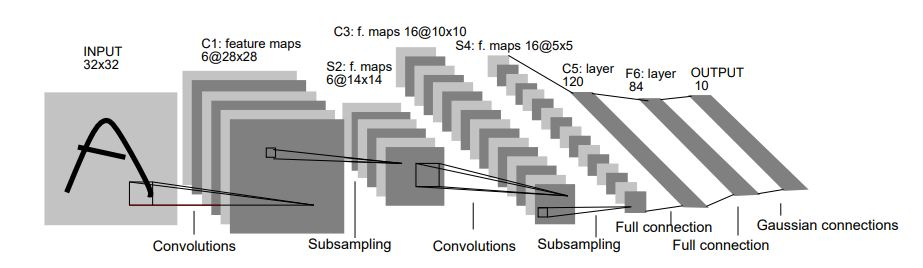

In [28]:
from IPython.display import Image
Image(filename='Lanet.JPG') 

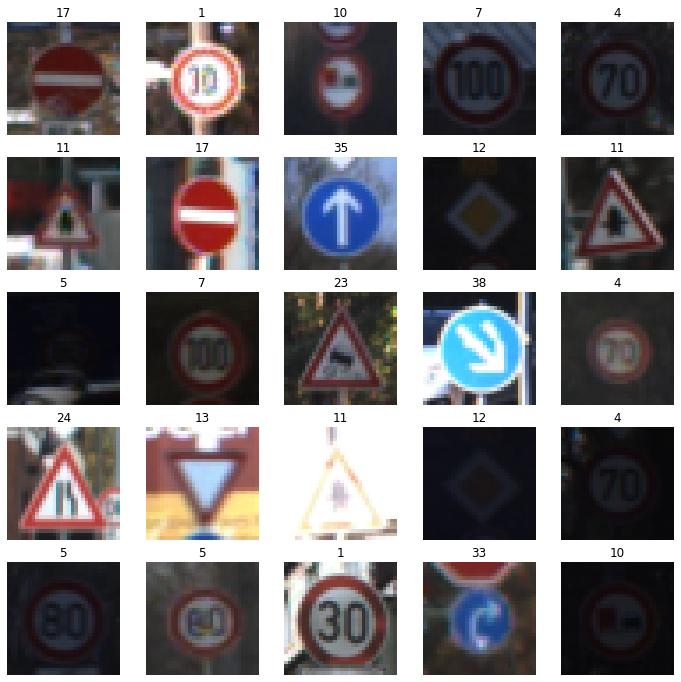

In [29]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in range(0,l*w):
    ran=np.random.randint(len(x_train))
    axes[i].imshow(x_train[ran])
    axes[i].set_title(y_train[ran])
    axes[i].axis("off")

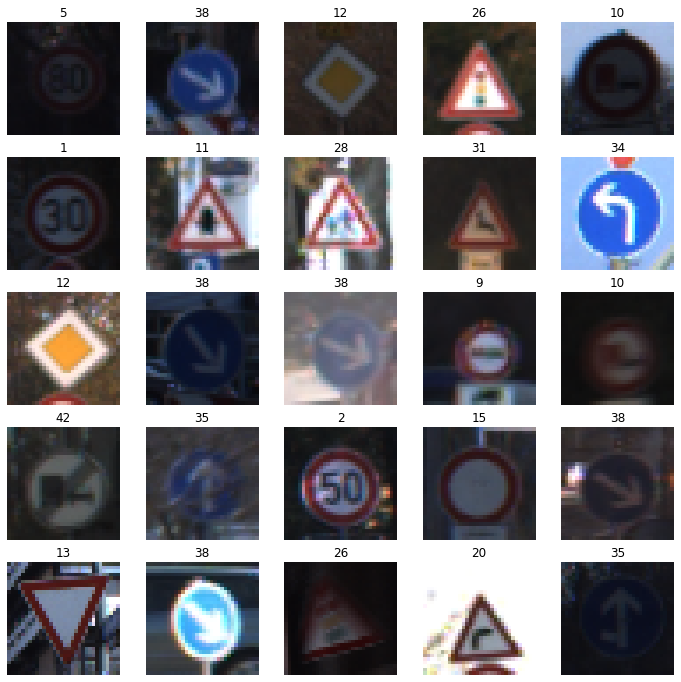

In [30]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in range(0,l*w):
    ran=np.random.randint(len(x_test))
    axes[i].imshow(x_test[ran])
    axes[i].set_title(y_test[ran])
    axes[i].axis("off")

In [31]:
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)

In [32]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)
x_val_gray = np.sum(x_val/3, axis=3, keepdims=True)

In [33]:
x_train_gray.shape,x_test_gray.shape,x_val_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [34]:
x_train_gray=x_train_gray/255
x_train_gray

array([[[[0.2627451 ],
         [0.30849673],
         [0.30588235],
         ...,
         [0.46928105],
         [0.45228758],
         [0.42745098]],

        [[0.22875817],
         [0.26797386],
         [0.25751634],
         ...,
         [0.60130719],
         [0.48235294],
         [0.43529412]],

        [[0.2248366 ],
         [0.25751634],
         [0.24575163],
         ...,
         [0.65751634],
         [0.50457516],
         [0.4496732 ]],

        ...,

        [[0.90457516],
         [0.3372549 ],
         [0.24313725],
         ...,
         [0.15424837],
         [0.1620915 ],
         [0.16601307]],

        [[0.95294118],
         [0.5869281 ],
         [0.26013072],
         ...,
         [0.17124183],
         [0.17385621],
         [0.16993464]],

        [[0.96993464],
         [0.8130719 ],
         [0.30588235],
         ...,
         [0.16732026],
         [0.16601307],
         [0.17124183]]],


       [[[0.22352941],
         [0.1869281 ],
         [0.17

In [35]:
x_test_gray=x_test_gray/255
x_val=x_val/255

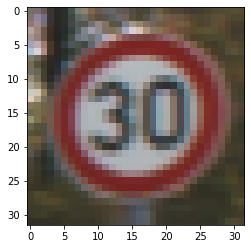

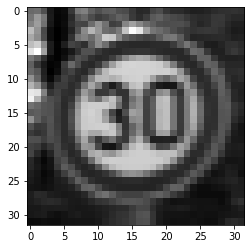

In [36]:
i=1000
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray[i].squeeze(),cmap='gray')

# Building model

In [37]:
from tensorflow import keras

c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cg-dte\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam

In [44]:
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(43,activation='softmax'))

In [49]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
history=model.fit(x_train_gray,y_train,batch_size=50,epochs=10,validation_data=(x_val_gray,y_val),verbose=1)

Epoch 1/10
696/696 [==============================] - 67s 96ms/step - loss: 0.2193 - accuracy: 0.9410 - val_loss: 69.8418 - val_accuracy: 0.8503
Epoch 2/10
696/696 [==============================] - 96s 137ms/step - loss: 0.1375 - accuracy: 0.9643 - val_loss: 64.5667 - val_accuracy: 0.8719
Epoch 3/10
696/696 [==============================] - 97s 139ms/step - loss: 0.0982 - accuracy: 0.9746 - val_loss: 70.2560 - val_accuracy: 0.8692
Epoch 4/10
696/696 [==============================] - 78s 113ms/step - loss: 0.0754 - accuracy: 0.9800 - val_loss: 94.4109 - val_accuracy: 0.8472
Epoch 5/10
696/696 [==============================] - 78s 113ms/step - loss: 0.0595 - accuracy: 0.9836 - val_loss: 84.8032 - val_accuracy: 0.8853
Epoch 6/10
696/696 [==============================] - 66s 95ms/step - loss: 0.0483 - accuracy: 0.9866 - val_loss: 66.5860 - val_accuracy: 0.8984
Epoch 7/10
696/696 [==============================] - 67s 97ms/step - loss: 0.0442 - accuracy: 0.9875 - val_loss: 65.4716 - va

In [53]:
score=model.evaluate(x_test_gray,y_test)

395/395 [==============================] - ETA: 0s - loss: 0.8191 - accuracy: 0.91 - 8s 20ms/step - loss: 0.8191 - accuracy: 0.9106


In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
loss=history.history['loss']
acc=history.history['accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']

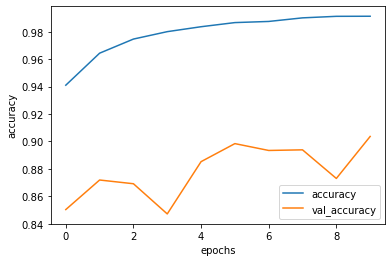

In [63]:
plt.plot(range(len(acc)),acc)
plt.plot(range(len(acc)),val_acc)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['accuracy','val_accuracy'])

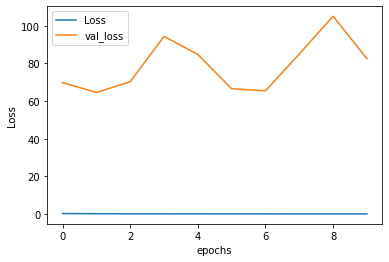

In [64]:
plt.plot(range(len(acc)),loss)
plt.plot(range(len(acc)),val_loss)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['Loss','val_loss'])

In [65]:
prediction=model.predict_classes(x_test_gray)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
cm

array([[ 53,   4,   0, ...,   0,   0,   0],
       [  1, 705,   2, ...,   0,   0,   0],
       [  0,  34, 687, ...,   0,   0,   0],
       ...,
       [  0,  18,   1, ...,  40,   0,   0],
       [  0,   0,   0, ...,   0,  46,   0],
       [  0,   0,   0, ...,   0,   2,  81]], dtype=int64)

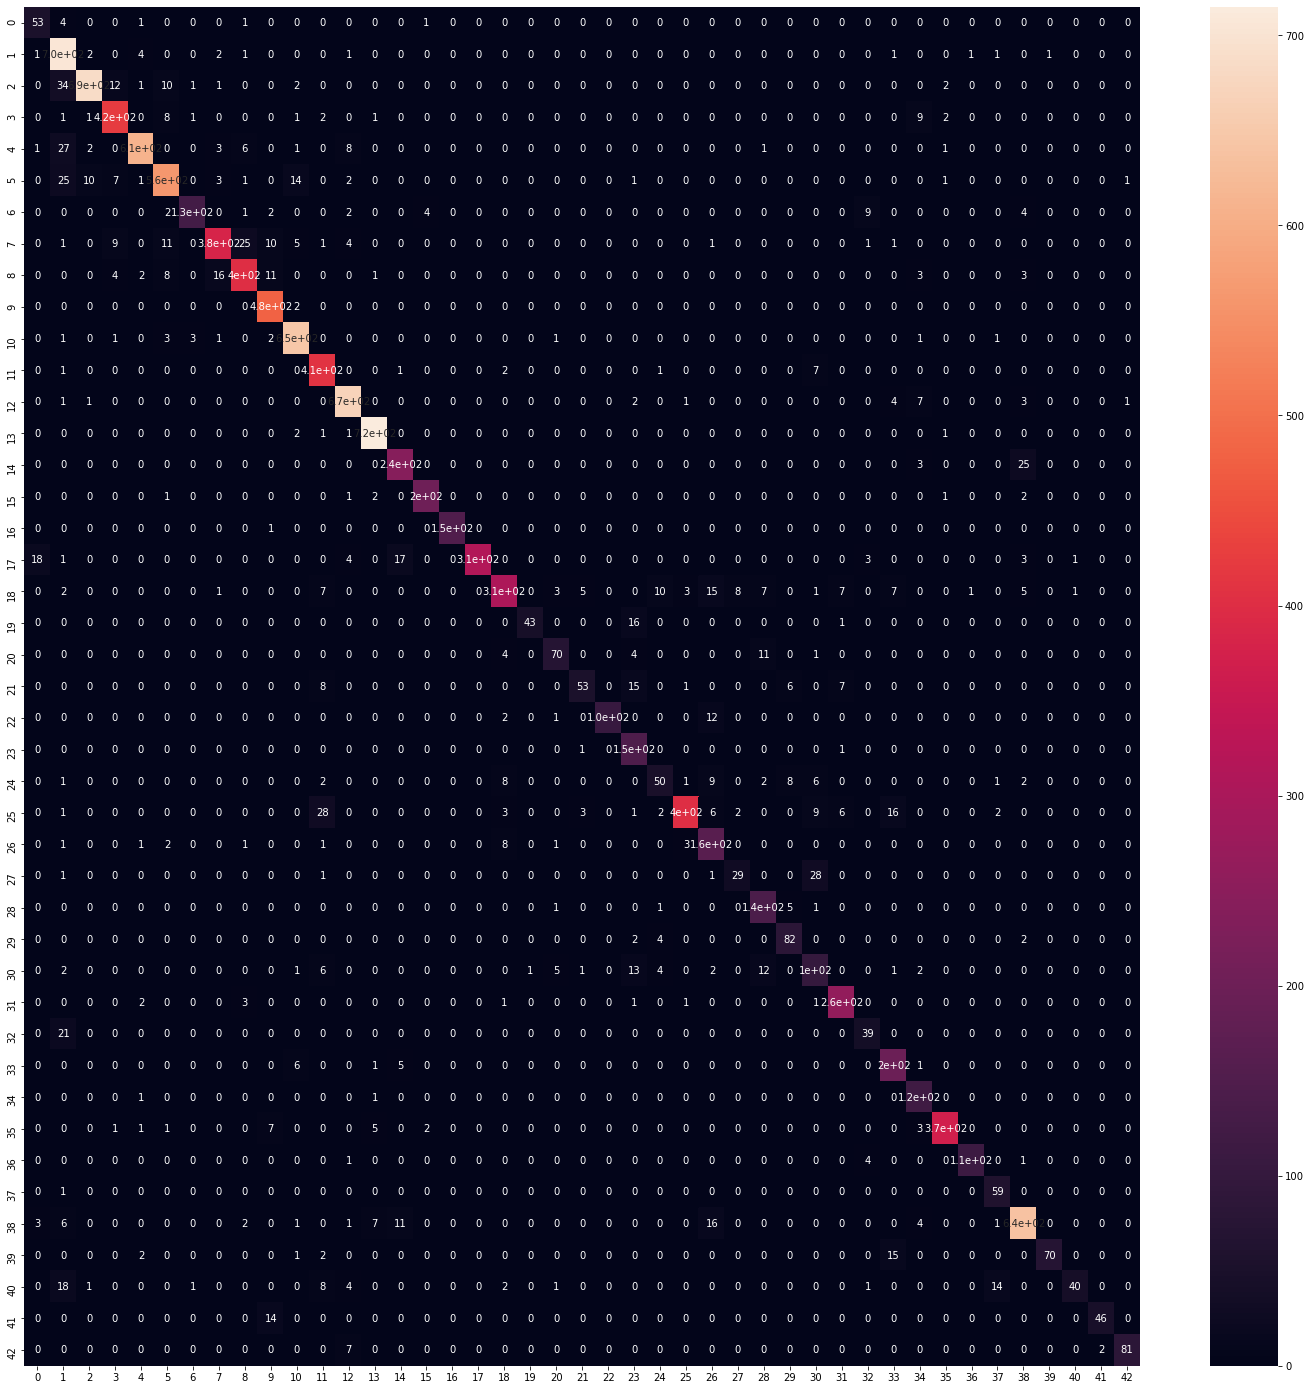

In [70]:
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

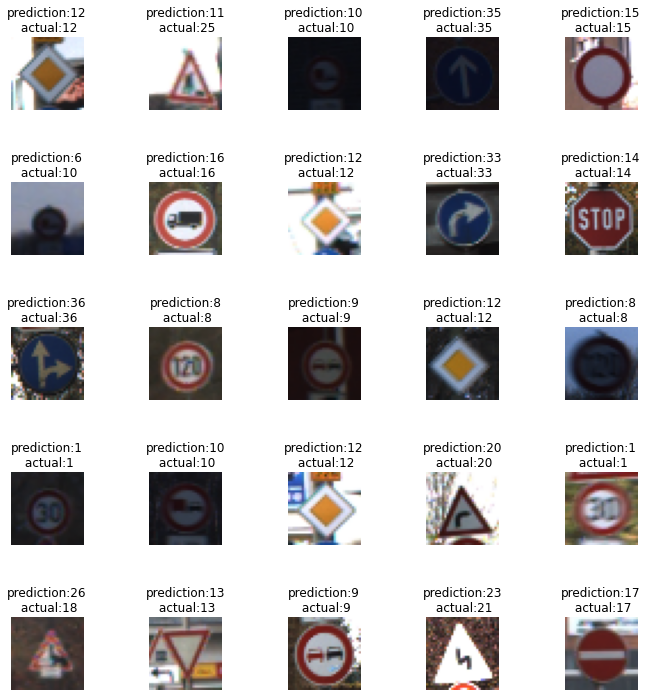

In [77]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in range(l*w):
    inn=np.random.randint(len(x_test))
    axes[i].imshow(x_test[inn])
    axes[i].set_title("prediction:{}\n actual:{}".format(prediction[inn],y_test[inn]))
    axes[i].axis("off")
plt.subplots_adjust(hspace=1)
